In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from imblearn.over_sampling import SMOTE

In [2]:
df=pd.read_excel('/glass.xlsx', sheet_name='glass')

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


#### Exploratory Data Analysis (EDA)

In [4]:
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df.shape

(214, 10)

In [7]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [9]:
df.drop_duplicates()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


#### Data Visualization:

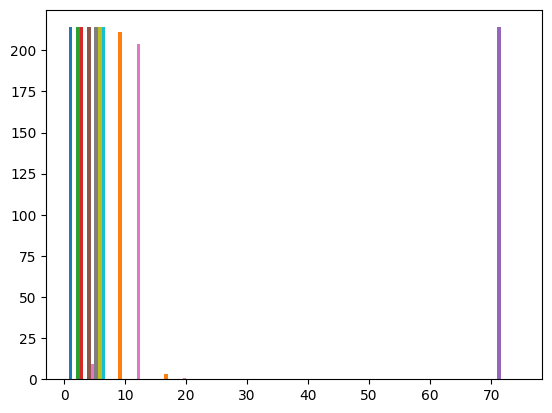

In [10]:
plt.hist(df)
plt.show()

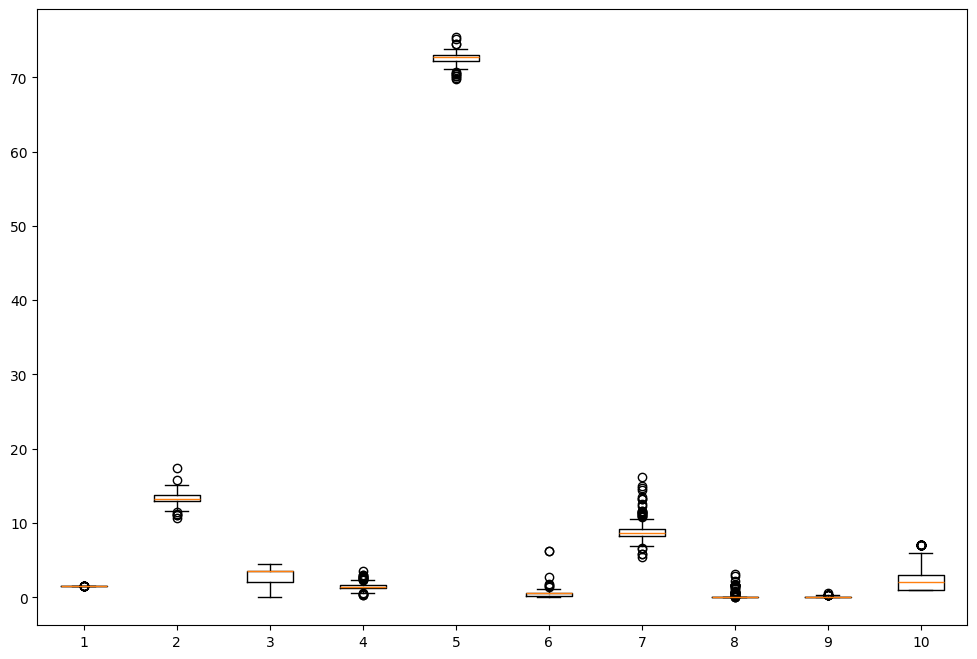

In [11]:
plt.figure(figsize=(12,8))
plt.boxplot(df)
plt.show()

In [12]:
corr_matrix=df.corr()
corr_matrix

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


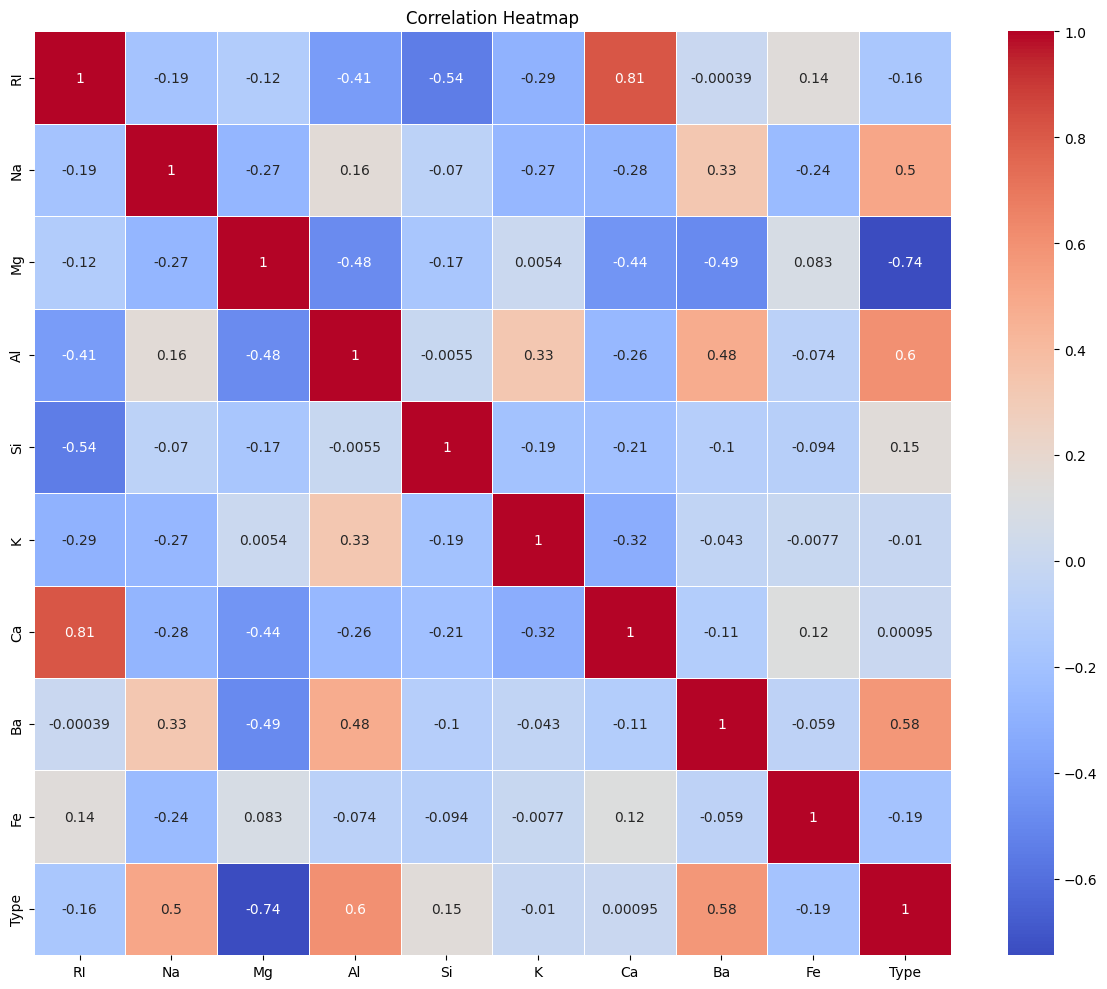

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

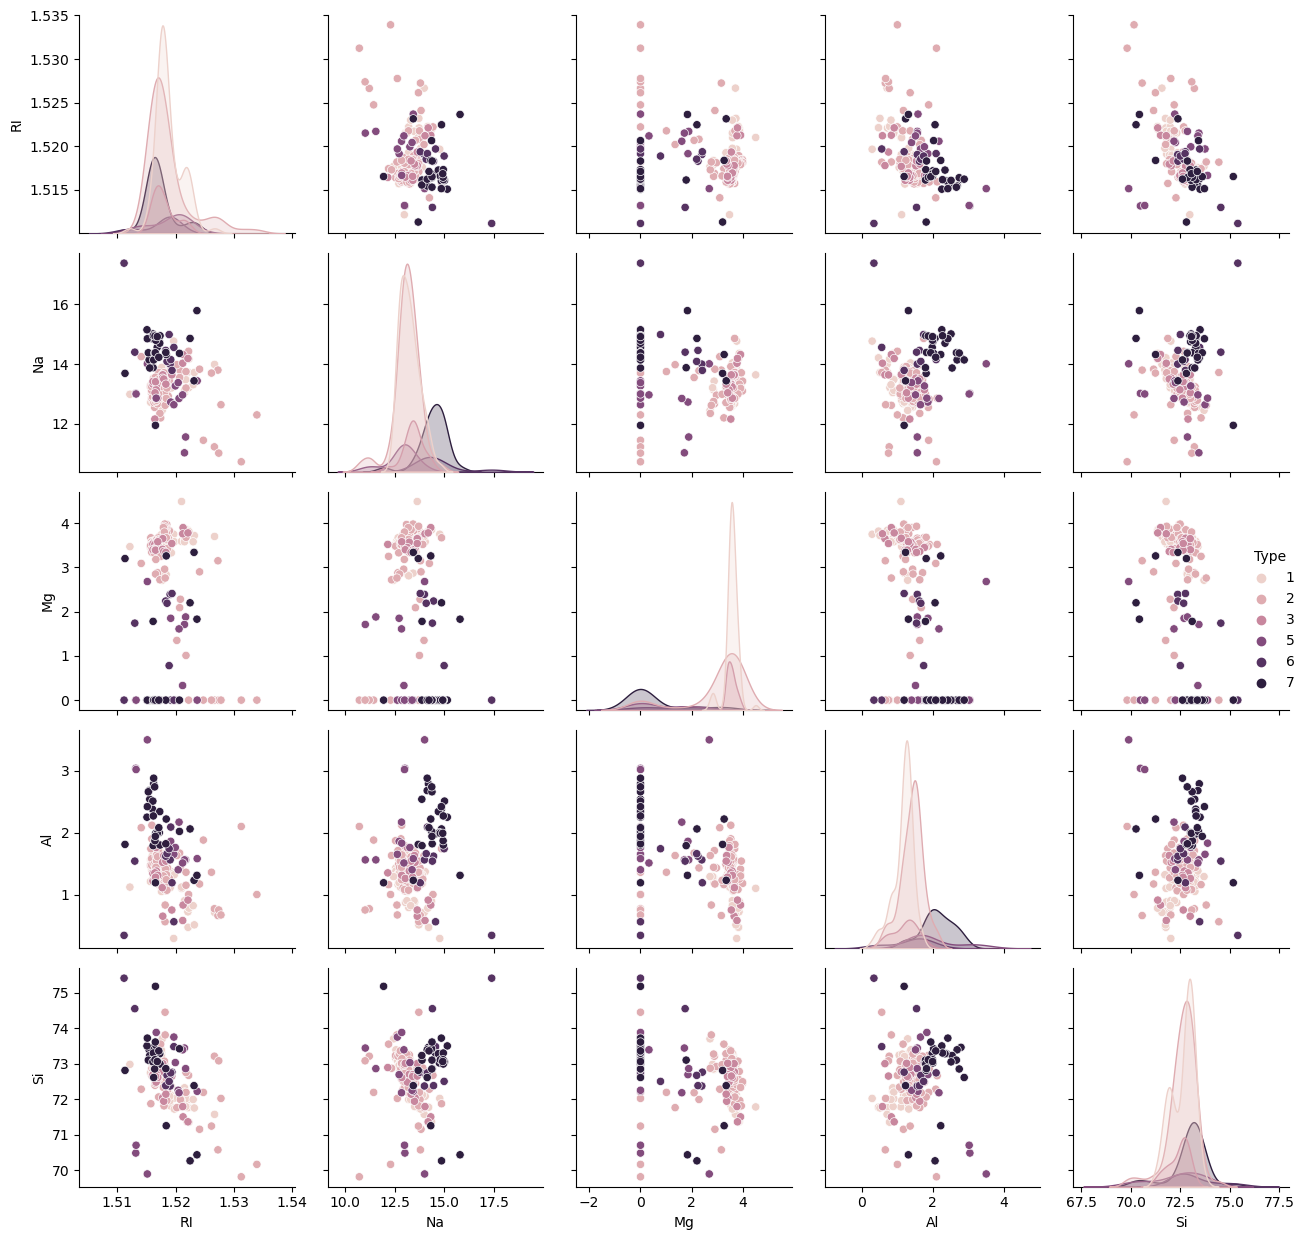

In [ ]:
sns.pairplot(df[['RI','Na','Mg','Al','Si','Type']],hue='Type')
plt.tight_layout()
plt.show()

#### Data Preprocessing

In [14]:
features=df.drop(columns='Type')
features.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [15]:
target=df[['Type']]
target.head()

,Type
0,1
1,1
2,1
3,1
4,1


In [24]:
scaler=StandardScaler()
features_scaled=scaler.fit_transform(features)
df1=pd.DataFrame(features_scaled,columns=features.columns)
df1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [25]:
smote=SMOTE(random_state=42)
features_resampled, target_resampled=smote.fit_resample(df1,target)

In [26]:
x_train,x_test,y_train,y_test=train_test_split(features_resampled,target_resampled,test_size=0.2,random_state=100)

In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(364, 9)
(92, 9)
(364, 1)
(92, 1)


In [28]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [29]:
y_pred=rf_model.predict(x_train)
y_pred

array([3, 3, 3, 3, 7, 2, 3, 2, 7, 3, 2, 6, 7, 3, 7, 5, 3, 2, 1, 6, 1, 5,
       7, 1, 5, 3, 7, 6, 5, 5, 1, 2, 7, 1, 1, 1, 5, 1, 5, 3, 1, 2, 7, 2,
       6, 6, 2, 6, 3, 7, 3, 3, 2, 1, 1, 3, 1, 7, 5, 3, 7, 1, 1, 5, 7, 1,
       3, 2, 3, 3, 3, 3, 7, 5, 5, 2, 6, 1, 3, 1, 7, 1, 6, 7, 1, 3, 3, 6,
       5, 1, 3, 3, 5, 3, 6, 1, 3, 7, 7, 2, 2, 5, 5, 5, 2, 6, 7, 1, 3, 1,
       1, 6, 5, 2, 3, 6, 1, 2, 6, 7, 6, 2, 2, 6, 2, 3, 7, 5, 1, 3, 3, 7,
       7, 7, 1, 7, 2, 6, 6, 3, 2, 7, 6, 7, 6, 5, 7, 7, 6, 6, 5, 7, 3, 1,
       5, 2, 2, 5, 7, 2, 1, 3, 3, 7, 1, 2, 6, 7, 7, 6, 7, 5, 6, 3, 6, 2,
       6, 2, 1, 6, 7, 7, 2, 7, 2, 3, 7, 2, 3, 6, 1, 6, 2, 6, 2, 6, 6, 7,
       7, 5, 1, 5, 3, 6, 7, 6, 2, 5, 1, 2, 6, 3, 2, 6, 1, 7, 1, 2, 3, 7,
       3, 2, 3, 3, 3, 1, 2, 1, 1, 5, 2, 5, 6, 3, 7, 5, 5, 3, 2, 5, 7, 2,
       2, 5, 3, 3, 1, 3, 5, 7, 5, 6, 7, 3, 3, 2, 5, 5, 2, 2, 3, 2, 2, 5,
       5, 7, 2, 1, 1, 5, 3, 1, 5, 6, 6, 6, 6, 1, 7, 7, 6, 2, 2, 6, 7, 6,
       1, 5, 6, 6, 1, 7, 1, 1, 2, 1, 2, 3, 7, 7, 3,

In [32]:
accuracy = accuracy_score(y_test,rf_model.predict(x_test))
print("Accuracy:",accuracy)

Accuracy: 0.9021739130434783


In [34]:
accuracy = accuracy_score(y_train,rf_model.predict(x_train))
print("Accuracy:",accuracy)

Accuracy: 1.0


In [37]:
report=classification_report(y_pred,y_train,digits=3)
print(report)

              precision    recall  f1-score   support

           1      1.000     1.000     1.000        58
           2      1.000     1.000     1.000        62
           3      1.000     1.000     1.000        65
           5      1.000     1.000     1.000        53
           6      1.000     1.000     1.000        65
           7      1.000     1.000     1.000        61

    accuracy                          1.000       364
   macro avg      1.000     1.000     1.000       364
weighted avg      1.000     1.000     1.000       364



In [39]:
print(classification_report(rf_model.predict(x_test),y_test))

              precision    recall  f1-score   support

           1       0.89      0.80      0.84        20
           2       0.64      0.90      0.75        10
           3       1.00      0.92      0.96        12
           5       0.91      1.00      0.95        21
           6       1.00      0.92      0.96        12
           7       1.00      0.88      0.94        17

    accuracy                           0.90        92
   macro avg       0.91      0.90      0.90        92
weighted avg       0.92      0.90      0.91        92



In [40]:
gb_model=GradientBoostingClassifier(n_estimators=100,random_state=42)
gb_model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=42)

In [41]:
gb_pred = gb_model.predict(x_test)

In [43]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           1       0.74      0.78      0.76        18
           2       0.77      0.71      0.74        14
           3       0.91      0.91      0.91        11
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        11
           7       1.00      1.00      1.00        15

    accuracy                           0.90        92
   macro avg       0.90      0.90      0.90        92
weighted avg       0.90      0.90      0.90        92



In [48]:
bagging_model = BaggingClassifier(n_estimators=100, random_state=42)
bagging_model.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:877: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(n_estimators=100, random_state=42)

In [50]:
bagging_pred = bagging_model.predict(x_test)
print(classification_report(y_test, bagging_pred))

              precision    recall  f1-score   support

           1       0.59      0.72      0.65        18
           2       0.71      0.36      0.48        14
           3       0.77      0.91      0.83        11
           5       1.00      0.87      0.93        23
           6       0.92      1.00      0.96        11
           7       0.83      1.00      0.91        15

    accuracy                           0.80        92
   macro avg       0.80      0.81      0.79        92
weighted avg       0.81      0.80      0.79        92



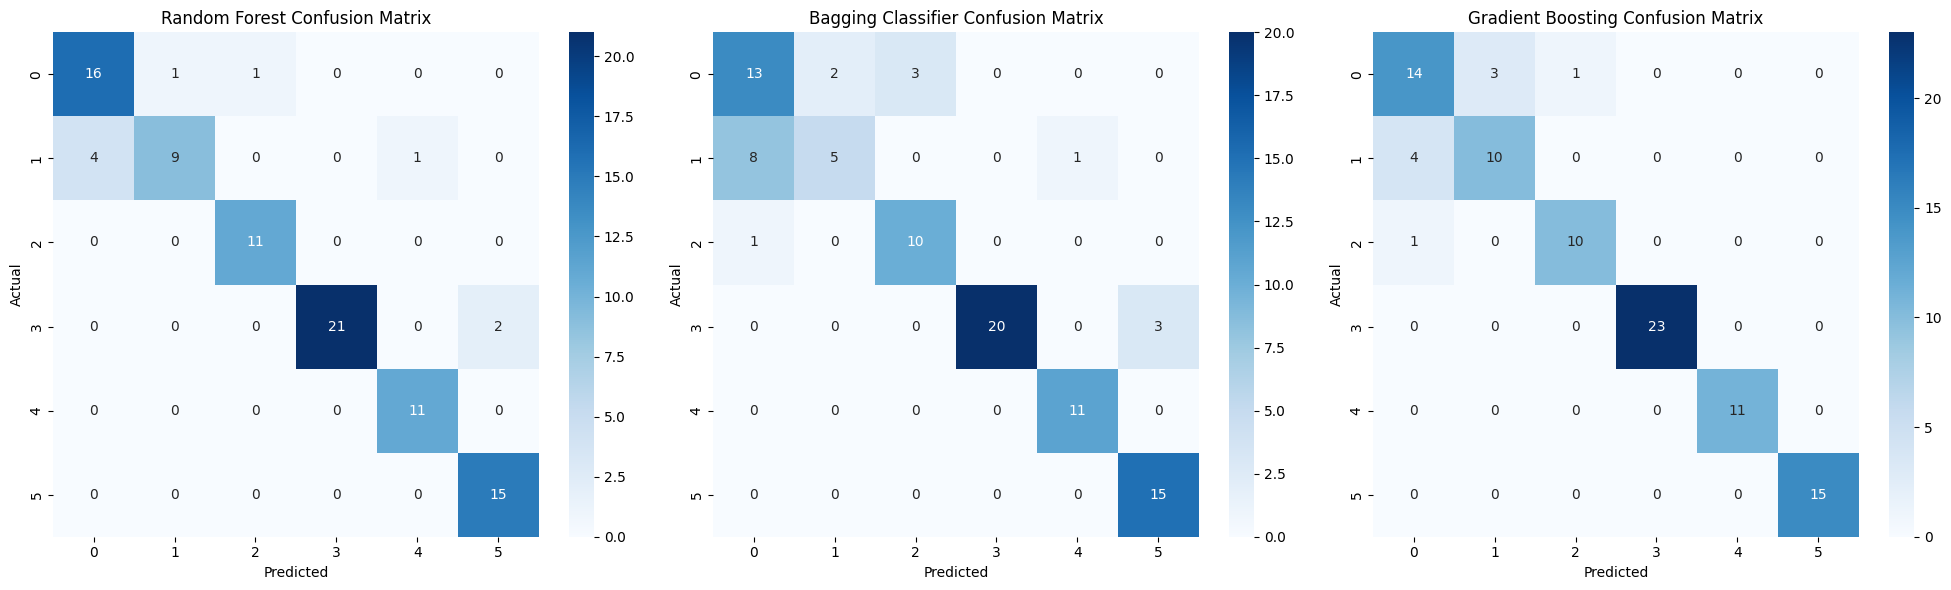

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Random Forest Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, bagging_pred), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Bagging Classifier Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, gb_pred), annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Gradient Boosting Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

#### INTERVIEW UESTIONS

## 1.Explain Bagging and Boosting methods. How is it different from each other


Bagging : Bagging involves training multiple instances of a base learning algorithm on different subsets of the training data, typically using random sampling
with replacement (bootstrap sampling). Each model is trained independently, and then their predictions are combined through averaging (for regression) or voting
(for classification). The idea behind bagging is to reduce variance and prevent overfitting by introducing diversity among the models. A popular example of
bagging is the Random Forest algorithm, which uses bagging with decision trees as base learner

Boosting: Boosting, on the other hand, involves training multiple weak learners sequentially, with each model trying to correct the mistakes made by its predecessor
Unlike bagging, where each model is trained independently, boosting learns from the mistakes of the previous models and gives more weight to the observations that were
incorrectly predicted. Boosting algorithms typically assign different weights to the training instances based on their importance. Examples of boosting algorithms
include AdaBoost (Adaptive Boosting), Gradient Boosting Machines (GBM), and XGBoost.s.

## 2.Explain how to handle imbalance in the data.

Resampling: Over-sampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples. Techniques like SMOTE
(Synthetic Minority Over-sampling Technique) create synthetic samples by interpolating between existing minority class samples. Under-sampling: Decrease
the number of instances in the majority class by randomly removing samples. However, this can lead to loss of information. Care should be taken to preserve
the representativeness of the dataset. Algorithmic Approaches: Use algorithms that are robust to class imbalance, such as tree-based algorithms like Random
Forest or gradient boosting machines (e.g., XGBoost, LightGBM). These algorithms are less sensitive to class imbalance because they partition the feature
space based on class purity. Utilize ensemble techniques like bagging and boosting, which can handle imbalanced data more effectively by combining multiple
weak learners. Cost-sensitive Learning: Adjust the misclassification costs associated with different classes. By assigning higher misclassification costs
to minority classes, classifiers can learn to prioritize correctly classifying these instances. Some algorithms, like SVM (Support Vector Machines) and
decision trees, allow for specifying class weights to penalize misclassification of minority classes. Evaluation Metrics: Choose appropriate evaluation
metrics that are sensitive to class imbalance. Accuracy is not suitable for imbalanced datasets since it can be misleading. Instead, use metrics like
precision, recall, F1-score, ROC-AUC (Receiver Operating Characteristic - Area Under the Curve), and PR-AUC (Precision-Recall Area Under the Curve).
Data Preprocessing: Normalize or standardize the data to ensure that features are on a similar scale. This can help algorithms converge faster and perform
better, especially for distance-based algorithms like SVM. Feature engineering can also help in creating informative features that better discriminate between
classes. Ensemble Methods: Ensemble methods like bagging and boosting can also be effective in handling imbalanced data. By combining multiple models trained
on different subsets of the data, these methods can reduce the impact of class imbalance on model performance. Advanced Techniques: Deep learning techniques
like attention mechanisms, class weighting, and focal loss have been developed to address imbalanced data in neural networks specifically. Cost-sensitive
learning algorithms, such as cost-sensitive SVM or cost-sensitive decision trees, explicitly consider the misclassification costs associated with different
classes.